<a href="https://colab.research.google.com/github/brnnwon/Fraud-detection/blob/main/3_Auto_Insurance_Fraud_Detection_CNN_ADASYN_(Without_Onehot).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset

In [ ]:
url = 'https://raw.githubusercontent.com/brnnwon/Fraud-detection/main/fraud_oracle.csv'

df = pd.read_csv(url)

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.shape

(15420, 33)

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

#Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from collections import Counter

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler


In [ ]:
df.drop(columns = 'PolicyNumber', inplace = True)

In [ ]:
for column in df:
  print(column)
  print(sorted(df[column].unique()), '\n')

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

<Axes: >

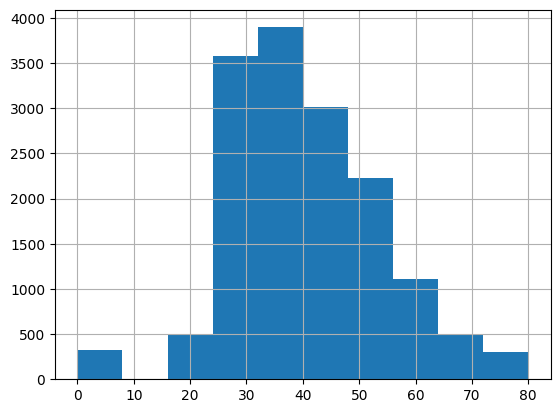

In [ ]:
df['Age'].hist()

In [ ]:
mean_age = df[df['Age'] > 0]['Age'].mean()

print(mean_age)

40.700331125827816


In [ ]:
# Replace age values equal to 0 with the calculated mean
df['Age'] = df['Age'].apply(lambda x: mean_age if x == 0 else x)

<Axes: >

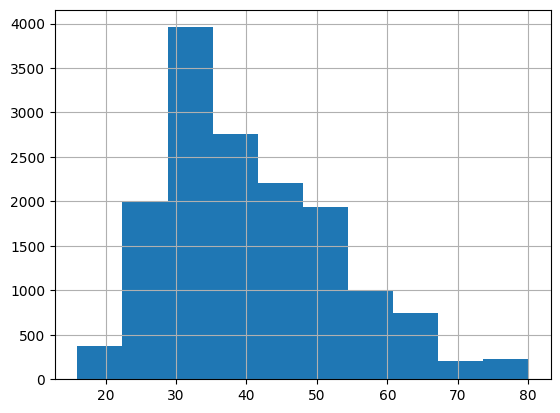

In [ ]:
df['Age'].hist()

In [ ]:
df['AccidentArea'] = df['AccidentArea'].replace({'Urban':1, 'Rural':0})
df['Sex'] = df['Sex'].replace({'Female':1, 'Male':0})
df['Fault'] = df['Fault'].replace({'Policy Holder':1, 'Third Party':0})
df['PoliceReportFiled'] = df['PoliceReportFiled'].replace({'Yes':1, 'No':0})
df['WitnessPresent'] = df['WitnessPresent'].replace({'Yes':1, 'No':0})
df['AgentType'] = df['AgentType'].replace({'External':1, 'Internal':0})
df['Month'] = df['Month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
df['DayOfWeek'] = df['DayOfWeek'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df['MonthClaimed'] = df['MonthClaimed'].replace({'0':0,'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].replace({'0':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].replace({'none':0 ,'1':1,'2 to 4':2,'more than 4':3})
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].replace({'none':0,'1 to 2':1,'3 to 5':2,'more than 5':4})
df['VehiclePrice'] = df['VehiclePrice'].replace({'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,
                                                 '40000 to 59000':3,'60000 to 69000':4,'more than 69000':5})
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace({'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2})
df['Days_Policy_Accident'] = df['Days_Policy_Accident'].replace({'none':0, '1 to 7':1, '8 to 15':2, '15 to 30':3, 'more than 30':4})
df['Days_Policy_Claim'] = df['Days_Policy_Claim'].replace({'none':0, '8 to 15':1, '15 to 30':2, 'more than 30':3})
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace({'16 to 17':0, '18 to 20':1, '21 to 25':2, '26 to 30':3, '31 to 35':4, '36 to 40':5, '41 to 50':6, '51 to 65':7, 'over 65':8})
df['AddressChange_Claim'] = df['AddressChange_Claim'].replace({'no change':0, 'under 6 months':1, '1 year':2, '2 to 3 years':3, '4 to 8 years':4})
df['NumberOfCars'] = df['NumberOfCars'].replace({'1 vehicle':0, '2 vehicles':1, '3 to 4':2, '5 to 8':3, 'more than 8':4})

In [ ]:
# Calculate the median of non-zero day-of-week values
median_day_of_week = df[df['DayOfWeekClaimed'] != 0]['DayOfWeekClaimed'].mode()
print(median_day_of_week)

0    1
Name: DayOfWeekClaimed, dtype: int64


In [ ]:
# Replace '0' values with the calculated median
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].apply(lambda x: median_day_of_week if x == 0 else x)

In [ ]:
mode_month_claimed = df[df['MonthClaimed'] != 0]['MonthClaimed'].mode()
print(mode_month_claimed)

0    1
Name: MonthClaimed, dtype: int64


In [ ]:
# Replace '0' values with the calculated median
df['MonthClaimed'] = df['MonthClaimed'].apply(lambda x: mode_month_claimed if x == 0 else x)

In [ ]:
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].astype('int')
df['MonthClaimed'] = df['MonthClaimed'].astype('int')

In [ ]:
#Instantiate label Encoder
labelencoder = LabelEncoder()

df['Make'] = labelencoder.fit_transform(df['Make'])

df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])

df['PolicyType'] = labelencoder.fit_transform(df['PolicyType'])

df['VehicleCategory'] = labelencoder.fit_transform(df['VehicleCategory'])

df['BasePolicy'] = labelencoder.fit_transform(df['BasePolicy'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int64  
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  int64  
 3   Make                  15420 non-null  int64  
 4   AccidentArea          15420 non-null  int64  
 5   DayOfWeekClaimed      15420 non-null  int64  
 6   MonthClaimed          15420 non-null  int64  
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  int64  
 9   MaritalStatus         15420 non-null  int64  
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  int64  
 12  PolicyType            15420 non-null  int64  
 13  VehicleCategory       15420 non-null  int64  
 14  VehiclePrice          15420 non-null  int64  
 15  FraudFound_P       

In [ ]:
X = df.drop('FraudFound_P', axis = 1)
y = df['FraudFound_P']

In [ ]:
print(X.shape, y.shape)

(15420, 31) (15420,)


In [ ]:
counter = Counter(y)
print(counter)

Counter({0: 14497, 1: 923})


In [ ]:
# transform the dataset
X, y = ADASYN().fit_resample(X, y)
#X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X.shape)
print(y.shape)

(28995, 31)
(28995,)


In [ ]:
counter = Counter(y)
print(counter)

Counter({1: 14498, 0: 14497})


Train set, Validation set, Test set

In [ ]:
# Assuming X, y are your features and labels after resampling
# First split: 85% for the combined training and validation, 15% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Second split: From the 85% data, split into 70% training and 15% validation
# To achieve this, we use test_size ≈ 0.1765 because 15% of the original is approximately 17.65% of the 85% data
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

# Print the shapes to verify
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (20295, 31) (20295,)
Validation set: (4350, 31) (4350,)
Test set: (4350, 31) (4350,)


In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 14498, 0: 14497})


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_val_scaled

array([[ 0.59749611, -0.48208187, -0.36017638, ..., -0.2274972 ,
         1.71791435,  0.39430311],
       [-0.89812336,  0.34790214,  0.69592123, ...,  2.97212562,
         0.39541419,  0.39430311],
       [ 0.29837222, -0.48208187,  0.16787243, ..., -0.2274972 ,
         0.39541419, -0.9434404 ],
       ...,
       [-0.29987557, -0.48208187, -1.41627399, ..., -0.2274972 ,
        -0.92708597, -0.9434404 ],
       [ 1.49486779,  1.17788615, -1.41627399, ..., -0.2274972 ,
         1.71791435,  0.39430311],
       [-0.59899947,  0.34790214,  0.69592123, ..., -0.2274972 ,
        -0.92708597, -0.9434404 ]])

In [ ]:
# Reshape the datasets for Conv1D
X_train_re = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_re = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_re = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Check the shape again
print("Training set shape:", X_train_re.shape)
print("Validation set shape:", X_val_re.shape)
print("Test set shape:", X_test_re.shape)

Training set shape: (20295, 31, 1)
Validation set shape: (4350, 31, 1)
Test set shape: (4350, 31, 1)


#CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

#1st layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train_re[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(rate=0.2))
#2nd layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(rate=0.2))
# build DNN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 30, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 14, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 14, 64)            2

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_re, y_train, epochs=50, validation_data=(X_val_re, y_val))

Epoch 1/50
635/635 [==============================] - 20s 8ms/step - loss: 0.7017 - accuracy: 0.6825 - val_loss: 0.4336 - val_accuracy: 0.8074
Epoch 2/50
635/635 [==============================] - 5s 8ms/step - loss: 0.5191 - accuracy: 0.7619 - val_loss: 0.3986 - val_accuracy: 0.8294
Epoch 3/50
635/635 [==============================] - 5s 8ms/step - loss: 0.4703 - accuracy: 0.7847 - val_loss: 0.3783 - val_accuracy: 0.8384
Epoch 4/50
635/635 [==============================] - 4s 7ms/step - loss: 0.4373 - accuracy: 0.8013 - val_loss: 0.3657 - val_accuracy: 0.8448
Epoch 5/50
635/635 [==============================] - 5s 8ms/step - loss: 0.4192 - accuracy: 0.8125 - val_loss: 0.3558 - val_accuracy: 0.8469
Epoch 6/50
635/635 [==============================] - 5s 7ms/step - loss: 0.4072 - accuracy: 0.8178 - val_loss: 0.3454 - val_accuracy: 0.8536
Epoch 7/50
635/635 [==============================] - 4s 7ms/step - loss: 0.3976 - accuracy: 0.8214 - val_loss: 0.3365 - val_accuracy: 0.8582
Epoch

##Accuracy Validation

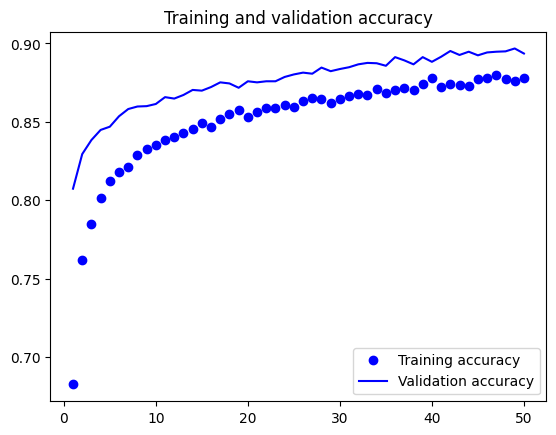

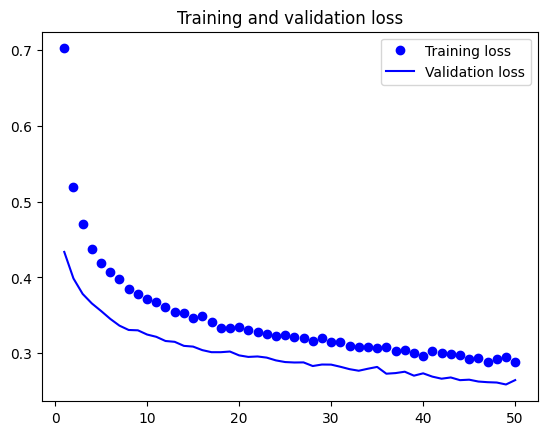

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
score=model.evaluate(X_test_re, y_test)
print(score)

136/136 [==============================] - 0s 3ms/step - loss: 0.2465 - accuracy: 0.9051
[0.2464943677186966, 0.9050574898719788]


In [ ]:
y_pred = model.predict(X_test_re)

136/136 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

In [ ]:
y_expected=pd.DataFrame(y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
cnf = confusion_matrix(y_test, y_pred.round())

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          text_fontsize='medium'):  # Add a parameter for text font size
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=text_fontsize)  # Set the font size here

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

##Confusion Matrix

Normalized confusion matrix
[[0.84409594 0.15590406]
 [0.03437214 0.96562786]]


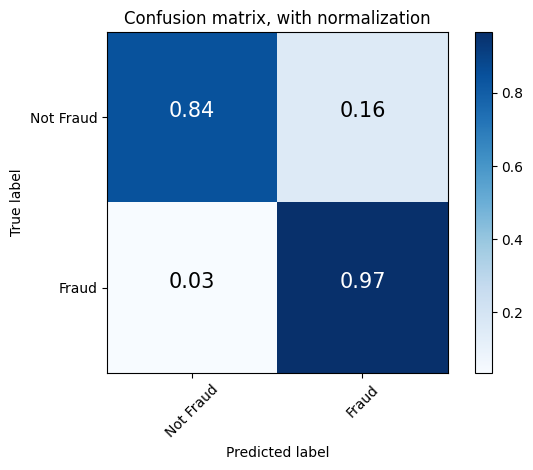

In [ ]:
plt.figure()
plot_confusion_matrix(cnf, classes=['Not Fraud','Fraud'], normalize = True,
                      title='Confusion matrix, with normalization',text_fontsize=15)

Confusion matrix, without normalization
[[1830  338]
 [  75 2107]]


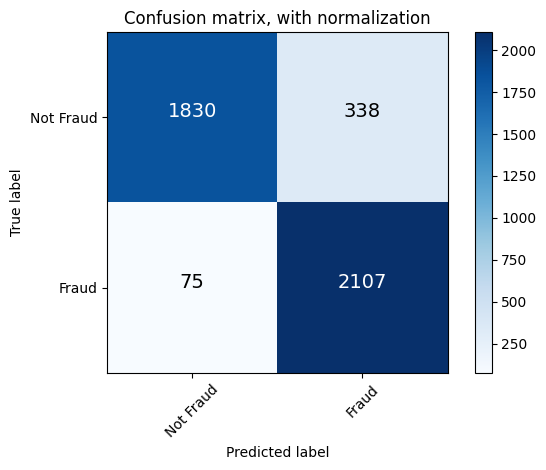

In [ ]:
plt.figure()
plot_confusion_matrix(cnf, classes=['Not Fraud','Fraud'], normalize = False,
                      title='Confusion matrix, with normalization',text_fontsize=14)

##CNN Classification report

In [ ]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2168
           1       0.86      0.97      0.91      2182

    accuracy                           0.91      4350
   macro avg       0.91      0.90      0.90      4350
weighted avg       0.91      0.91      0.90      4350



In [ ]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9050574712643679
0.8617586912065439
0.965627864344638
0.9107413010590015


In [ ]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

# Print the metrics as percentages
print('Accuracy: {:0.2f}%'.format(accuracy * 100))
print('Precision: {:0.2f}%'.format(precision * 100))
print('Recall: {:0.2f}%'.format(recall * 100))
print('F1 Score: {:0.2f}%'.format(f1 * 100))

Accuracy: 90.51%
Precision: 86.18%
Recall: 96.56%
F1 Score: 91.07%


Save the training model

In [ ]:
model.save('CNN_ADASYN_with_out_ohe.keras')

Load the model later

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the model
# loaded_model = load_model('my_model.h5')